# World's 100 most expensive footballers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#opening file
df = pd.read_csv('Top_footballers.csv', encoding = 'latin-1')
df.head()

,sr,name,club,year,fees
0,1,Neymar,Barcelona - PSG,2017,222m
1,2,Kylian Mbappe,Monaco - PSG,2017,145m (+35m)
2,3,Joao Felix,Benfica - Atletico Madrid,2019,126m
3,4,Enzo Fernandez,Benfica - Chelsea,2023,121m
4,5,Philippe Coutinho,Liverpool - Barcelona,2018,120m (+40m)


In [3]:
#Creating new columns to show which clubs were the sellers and which ones were the buyers
df[['seller', 'buyer']] = df['club'].str.split('-', expand=True)

#Creating new columns to separate original fees from aditional fees
df[['original_fees', 'plus_fees']] = df['fees'].str.split('(', expand=True)
df

,sr,name,club,year,fees,seller,buyer,original_fees,plus_fees
0,1,Neymar,Barcelona - PSG,2017,222m,Barcelona,PSG,222m,None
1,2,Kylian Mbappe,Monaco - PSG,2017,145m (+35m),Monaco,PSG,145m,+35m)
2,3,Joao Felix,Benfica - Atletico Madrid,2019,126m,Benfica,Atletico Madrid,126m,None
3,4,Enzo Fernandez,Benfica - Chelsea,2023,121m,Benfica,Chelsea,121m,None
4,5,Philippe Coutinho,Liverpool - Barcelona,2018,120m (+40m),Liverpool,Barcelona,120m,+40m)
...,...,...,...,...,...,...,...,...,...
97,90,Victor Osimhen,Lille - Napoli,2020,50m,Lille,Napoli,50m,None
98,97,Anthony Martial,Monaco - Manchester United,2015,49.3m,Monaco,Manchester United,49.3m,None
99,98,Gylfi Sigurdsson,Swansea City - Everton,2017,49.2m,Swansea City,Everton,49.2m,None
100,99,Leroy Sane,Manchester City - Bayern Munich,2020,49m (+11m),Manchester City,Bayern Munich,49m,+11m)


### Cleaning data

In [4]:
#Replacing NaN values
df['plus_fees'] = df['plus_fees'].fillna(0)
df

,sr,name,club,year,fees,seller,buyer,original_fees,plus_fees
0,1,Neymar,Barcelona - PSG,2017,222m,Barcelona,PSG,222m,0
1,2,Kylian Mbappe,Monaco - PSG,2017,145m (+35m),Monaco,PSG,145m,+35m)
2,3,Joao Felix,Benfica - Atletico Madrid,2019,126m,Benfica,Atletico Madrid,126m,0
3,4,Enzo Fernandez,Benfica - Chelsea,2023,121m,Benfica,Chelsea,121m,0
4,5,Philippe Coutinho,Liverpool - Barcelona,2018,120m (+40m),Liverpool,Barcelona,120m,+40m)
...,...,...,...,...,...,...,...,...,...
97,90,Victor Osimhen,Lille - Napoli,2020,50m,Lille,Napoli,50m,0
98,97,Anthony Martial,Monaco - Manchester United,2015,49.3m,Monaco,Manchester United,49.3m,0
99,98,Gylfi Sigurdsson,Swansea City - Everton,2017,49.2m,Swansea City,Everton,49.2m,0
100,99,Leroy Sane,Manchester City - Bayern Munich,2020,49m (+11m),Manchester City,Bayern Munich,49m,+11m)


In [5]:
#Deleting strange values in columns 'original_fees' and 'plus_fees'
df['plus_fees'] = df['plus_fees'].str.replace('+', '')
df['plus_fees'] = df['plus_fees'].str.replace('', '')
df['plus_fees'] = df['plus_fees'].str.replace(')', '')
df['plus_fees'] = df['plus_fees'].str.replace('m', '')
df['plus_fees'] = df['plus_fees'].str.replace('inc. Danilo', '0')
df['original_fees'] = df['original_fees'].str.replace('', '')
df['original_fees'] = df['original_fees'].str.replace('m', '')
df

C:\Users\hanss\AppData\Local\Temp\ipykernel_21656\3423543299.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['plus_fees'] = df['plus_fees'].str.replace('+', '')
C:\Users\hanss\AppData\Local\Temp\ipykernel_21656\3423543299.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['plus_fees'] = df['plus_fees'].str.replace(')', '')
C:\Users\hanss\AppData\Local\Temp\ipykernel_21656\3423543299.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['plus_fees'] = df['plus_fees'].str.replace('inc. Danilo', '0')


,sr,name,club,year,fees,seller,buyer,original_fees,plus_fees
0,1,Neymar,Barcelona - PSG,2017,222m,Barcelona,PSG,222,NaN
1,2,Kylian Mbappe,Monaco - PSG,2017,145m (+35m),Monaco,PSG,145,35
2,3,Joao Felix,Benfica - Atletico Madrid,2019,126m,Benfica,Atletico Madrid,126,NaN
3,4,Enzo Fernandez,Benfica - Chelsea,2023,121m,Benfica,Chelsea,121,NaN
4,5,Philippe Coutinho,Liverpool - Barcelona,2018,120m (+40m),Liverpool,Barcelona,120,40
...,...,...,...,...,...,...,...,...,...
97,90,Victor Osimhen,Lille - Napoli,2020,50m,Lille,Napoli,50,NaN
98,97,Anthony Martial,Monaco - Manchester United,2015,49.3m,Monaco,Manchester United,49.3,NaN
99,98,Gylfi Sigurdsson,Swansea City - Everton,2017,49.2m,Swansea City,Everton,49.2,NaN
100,99,Leroy Sane,Manchester City - Bayern Munich,2020,49m (+11m),Manchester City,Bayern Munich,49,11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sr             102 non-null    int64 
 1   name           102 non-null    object
 2   club           102 non-null    object
 3   year           102 non-null    int64 
 4   fees           102 non-null    object
 5   seller         102 non-null    object
 6   buyer          102 non-null    object
 7   original_fees  102 non-null    object
 8   plus_fees      26 non-null     object
dtypes: int64(2), object(7)
memory usage: 7.3+ KB


In [7]:
#Given that values in columns 'original_fees' and 'plus_fees' are type object, converting them into type float is necessary
df['original_fees'] = df['original_fees'].astype('float64')
df['plus_fees'] = df['plus_fees'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sr             102 non-null    int64  
 1   name           102 non-null    object 
 2   club           102 non-null    object 
 3   year           102 non-null    int64  
 4   fees           102 non-null    object 
 5   seller         102 non-null    object 
 6   buyer          102 non-null    object 
 7   original_fees  102 non-null    float64
 8   plus_fees      26 non-null     float64
dtypes: float64(2), int64(2), object(5)
memory usage: 7.3+ KB


In [8]:
#Dropping unnecessary columns
df.drop(['club', 'fees'], axis=1, inplace=True)
df

,sr,name,year,seller,buyer,original_fees,plus_fees
0,1,Neymar,2017,Barcelona,PSG,222.0,NaN
1,2,Kylian Mbappe,2017,Monaco,PSG,145.0,35.0
2,3,Joao Felix,2019,Benfica,Atletico Madrid,126.0,NaN
3,4,Enzo Fernandez,2023,Benfica,Chelsea,121.0,NaN
4,5,Philippe Coutinho,2018,Liverpool,Barcelona,120.0,40.0
...,...,...,...,...,...,...,...
97,90,Victor Osimhen,2020,Lille,Napoli,50.0,NaN
98,97,Anthony Martial,2015,Monaco,Manchester United,49.3,NaN
99,98,Gylfi Sigurdsson,2017,Swansea City,Everton,49.2,NaN
100,99,Leroy Sane,2020,Manchester City,Bayern Munich,49.0,11.0


In [9]:
#Deleting blank spaces
df['buyer'] = df['buyer'].str.strip()
df['seller'] = df['seller'].str.strip()

#### Now, we will focus on analyzing data, trying to find out which club spent the most amount of money

In [10]:
df_global_fees = df.groupby(df['buyer'])[['original_fees', 'plus_fees']].sum()
df_global_fees = df_global_fees.reset_index()
df_global_fees

,buyer,original_fees,plus_fees
0,Arsenal,356.65,7.0
1,Atletico Madrid,257.00,0.0
2,Barcelona,882.00,106.0
3,Bayern Munich,196.00,21.0
4,Chelsea,1127.50,47.2
5,Everton,49.20,0.0
6,Inter,129.00,0.0
7,Jiangsu Suning,50.00,0.0
8,Juventus,464.00,20.5
9,Lazio,55.00,0.0


In [11]:
#Creating a new column to show the total fees spent by each club
df_global_fees['total_fees'] = df_global_fees['original_fees'] + df_global_fees['plus_fees']
df_global_fees

,buyer,original_fees,plus_fees,total_fees
0,Arsenal,356.65,7.0,363.65
1,Atletico Madrid,257.00,0.0,257.00
2,Barcelona,882.00,106.0,988.00
3,Bayern Munich,196.00,21.0,217.00
4,Chelsea,1127.50,47.2,1174.70
5,Everton,49.20,0.0,49.20
6,Inter,129.00,0.0,129.00
7,Jiangsu Suning,50.00,0.0,50.00
8,Juventus,464.00,20.5,484.50
9,Lazio,55.00,0.0,55.00


In [12]:
#Sorting total fees values
df_total_fees = df_global_fees.sort_values('total_fees', ascending=False)[['buyer','total_fees']]

#Reseting index and dropping duplicated 'buyer' column
df_total_fees.index = df_total_fees['buyer']
df_total_fees.drop('buyer', axis=1, inplace=True)
df_total_fees

,total_fees
buyer,
Chelsea,1174.70
Barcelona,988.00
Manchester City,935.10
Manchester United,925.30
Real Madrid,837.30
PSG,661.60
Juventus,484.50
Liverpool,367.50
Arsenal,363.65


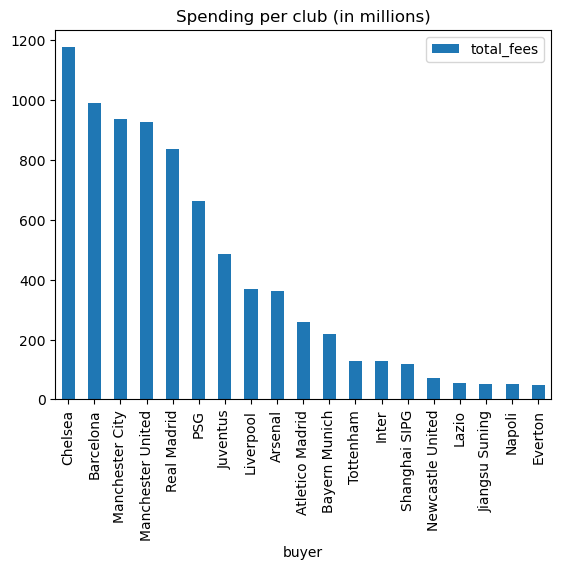

In [13]:
#Bar plot of total fees per club
df_total_fees.plot(kind='bar')
plt.title('Spending per club (in millions)')
plt.show()

#### Analyzing spending per country

In [14]:
df_total_fees = df_total_fees.reset_index()
df_total_fees

,buyer,total_fees
0,Chelsea,1174.70
1,Barcelona,988.00
2,Manchester City,935.10
3,Manchester United,925.30
4,Real Madrid,837.30
5,PSG,661.60
6,Juventus,484.50
7,Liverpool,367.50
8,Arsenal,363.65
9,Atletico Madrid,257.00


In [15]:
#Creating a dictionary to classify each club by the country they are from
countries_dict = {
    'Chelsea': 'England',
    'Manchester United': 'England',
    'Manchester City': 'England',
    'Liverpool': 'England',
    'Arsenal': 'England',
    'Tottenham': 'England',
    'Newcastle United': 'England',
    'Everton': 'England',
    'Barcelona': 'Spain',
    'Real Madrid': 'Spain',
    'Atletico Madrid': 'Spain',
    'PSG': 'France',
    'Juventus': 'Italy',
    'Inter': 'Italy',
    'Lazio': 'Italy',
    'Napoli': 'Italy',
    'Bayern Munich': 'Germany',
    'Shanghai SIPG': 'China',
    'Jiangsu Suning': 'China',
    
    
}

In [16]:
#Creating a new column by mapping an existing column
df_total_fees['country'] = df_total_fees['buyer'].map(countries_dict)
df_total_fees

,buyer,total_fees,country
0,Chelsea,1174.70,England
1,Barcelona,988.00,Spain
2,Manchester City,935.10,England
3,Manchester United,925.30,England
4,Real Madrid,837.30,Spain
5,PSG,661.60,France
6,Juventus,484.50,Italy
7,Liverpool,367.50,England
8,Arsenal,363.65,England
9,Atletico Madrid,257.00,Spain


In [17]:
#Grouping data by country
df_country_fees = df_total_fees.groupby(df_total_fees['country']).sum()
df_country_fees

,total_fees
country,
China,168.90
England,4015.45
France,661.60
Germany,217.00
Italy,718.50
Spain,2082.30


In [18]:
#Sorting data by total spending
df_country_fees.sort_values('total_fees', ascending=False)

,total_fees
country,
England,4015.45
Spain,2082.30
Italy,718.50
France,661.60
Germany,217.00
China,168.90


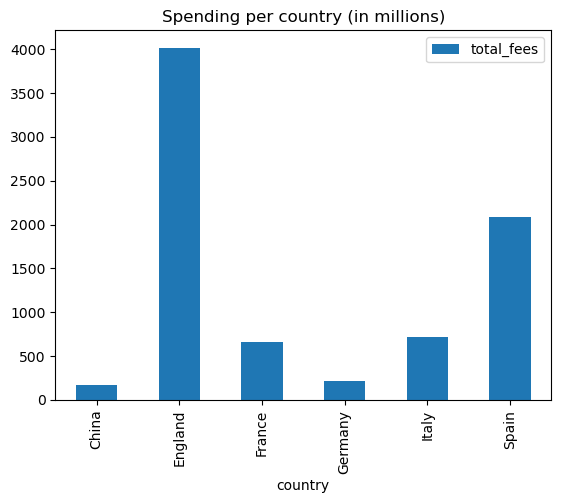

In [19]:
df_country_fees.plot(kind='bar')
plt.title('Spending per country (in millions)')
plt.show()

### Conclusions

1. Chelsea is the club that invested the most money in buying players.
2. Premier League (England's league) is the one that spent the most on buying players.
3. China's league is among the leagues that spent the most on player transfers despite not being a top-10 league (measured by both performance and impact, according to FIFA).